# Python Programming for Finance

- <a>1. Intro and Getting Stock Price Data</a>
- <a>2. Handling Data and Graphing</a>
- <a>3. Basic stock data Manipulation</a>




https://pythonprogramming.net/getting-stock-prices-python-programming-for-finance/

## <a>1. Intro and Getting Stock Price Data</a>

Required Modules to start:
- Numpy
- Matplotlib
- Pandas
- Pandas-datareader
- BeautifulSoup4
- scikit-learn / learn
- mplfinance (pip install)
- pandas_datareader
- tqdm

In [4]:
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from collections import Counter
from sklearn import svm, neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
import mplfinance as mpf

from tqdm import tqdm # progress

style.use('ggplot')
mpl.rcParams['figure.figsize'] = (16.0, 9.0)
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

start = dt.datetime(1980, 1, 1)
end = dt.datetime.now()

df = web.DataReader("XOM", 'yahoo', start, end)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
# df = df.drop("Symbol", axis=1)

print(df.head())
# print( df.tail(6))
print(df.describe())
print(df.info())

                High       Low      Open     Close     Volume  Adj Close
Date                                                                    
1980-01-02  3.453125  3.351562  3.445312  3.367188  6622400.0   0.607339
1980-01-03  3.320312  3.250000  3.320312  3.281250  7222400.0   0.591838
1980-01-04  3.328125  3.281250  3.281250  3.312500  4780800.0   0.597475
1980-01-07  3.359375  3.289062  3.312500  3.296875  8331200.0   0.594657
1980-01-08  3.328125  3.273438  3.296875  3.320312  8048000.0   0.598884
               High           Low          Open         Close        Volume  \
count  10196.000000  10196.000000  10196.000000  10196.000000  1.019600e+04   
mean      42.115644     41.365335     41.741113     41.754525  1.155135e+07   
std       31.678498     31.178002     31.429425     31.439080  9.203186e+06   
min        3.171875      3.109375      3.140625      3.125000  3.828000e+05   
25%       12.000000     11.781250     11.875000     11.906250  5.325500e+06   
50%       36.90

## <a>2. Handling Data and Graphing</a>

In [11]:
# # save and read from csv
# df2 = web.DataReader("TSLA", 'yahoo', dt.datetime(1970, 1, 1), end)
# df2.to_csv('data/tsla.csv')
# df = pd.read_csv('data/tsla.csv', parse_dates = True, index_col = 0)
# df.reset_index(inplace=True)
# df.set_index("Date", inplace=True)

# plt.plot(df2['Adj Close'])
# plt.show()

## <a>3. Basic stock data Manipulation</a>

Moving average

[Text(0, 0.5, 'Volume'), Text(0.5, 0, 'Date')]

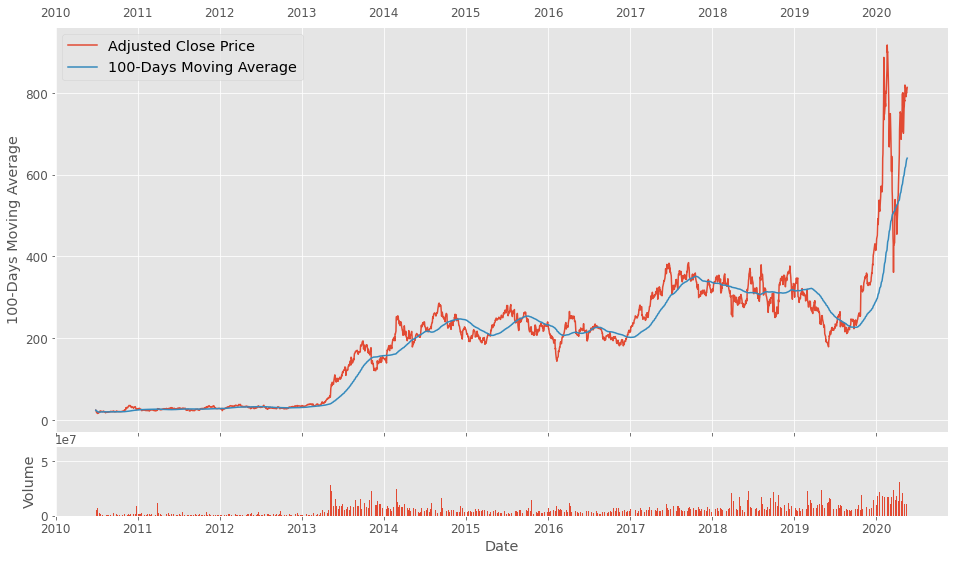

In [12]:
period = 100
df['100ma'] = df['Adj Close'].rolling(window=period, min_periods=0).mean()
df.dropna(inplace=True)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)

ax1.plot(df.index, df['Adj Close'], label='Adjusted Close Price')
ax1.plot(df.index, df['100ma'], label = str(period) + '-Days Moving Average')
ax1.legend()
ax1.set(xlabel='', ylabel = str(period) + '-Days Moving Average')
ax1.xaxis.set_tick_params(labeltop=True, labelbottom=False)

ax2.bar(df.index, df['Volume'])
ax2.set(xlabel=df.index.name, ylabel='Volume')

## <a>4. More stock manipulations</a>

An OHLC chart, called a candlestick chart, is a chart that condenses the open, high, low, and close data all in one nice format.

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


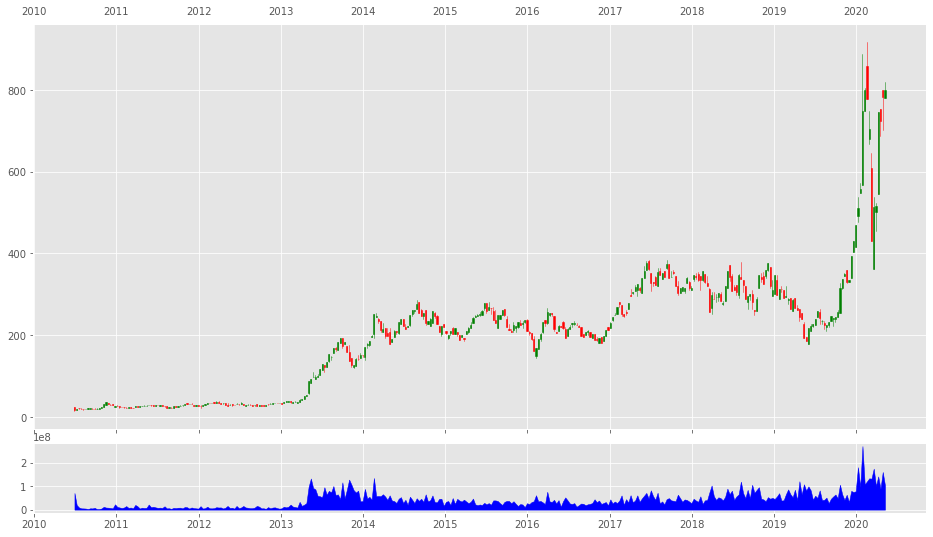

In [15]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

df = pd.read_csv('data/tsla.csv', parse_dates=True, index_col=0)

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_ohlc['Volume'] = df['Volume'].resample('10D').sum()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

print(df.head())

# # New API
# mpf.plot(df, type='candle', mav=(3,6,9),volume=True)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()
ax1.xaxis.set_tick_params(labeltop=True, labelbottom=False)

candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0, color='b')
plt.show()

### <a>5. Automating getting the S&P 500 list</a>

Web scraping with Beautiful Soup: 
https://pythonprogramming.net/introduction-scraping-parsing-beautiful-soup-tutorial/

SP500: http://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [17]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker.rstrip().replace('.', '-'))
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    print('Total number: ', len(tickers))
    return tickers

save_sp500_tickers()

Total number:  505


['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO'

### <a>6. Getting all company pricing data in the S&P 500</a>

In [19]:
import bs4 as bs
import datetime as dt
import os
import pandas_datareader.data as web
import pickle
import requests
import time

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker.rstrip().replace('.', '-'))
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers


# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
#              time.sleep(0.5)
#             df.reset_index(inplace=True)
#             df.set_index("Date", inplace=True)
#             df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))


get_data_from_yahoo()

Already have MMM
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have ADS
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AMCR
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have ADI
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AIV
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ANET
Already have AJG
Already have AIZ
Already have T
Already have ATO
Already have ADSK
Already have AD

### <a>7. Combining all S&P 500 company prices into one DataFrame</a>

Note: data for certain date are null.

Learn:
>`df.rename(columns={'Adj Close': ticker}, inplace=True)
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
main_df = main_df.join(df, how='outer')`

In [20]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tqdm(tickers)):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

#         if count % 10 == 0:
#             print(count)
            
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()

100%|████████████████████████████████████████████████████████████████████████████████| 505/505 [00:13<00:00, 37.66it/s]


                  MMM        ABT  ABBV  ABMD        ACN       ATVI       ADBE  \
Date                                                                            
2010-01-04  63.519070  20.301096   NaN  8.74  33.719078  10.126624  37.090000   
2010-01-05  63.121239  20.137075   NaN  8.53  33.927479  10.144546  37.700001   
2010-01-06  64.016403  20.248909   NaN  8.40  34.288147  10.090778  37.619999   
2010-01-07  64.062294  20.416655   NaN  8.40  34.256084   9.848815  36.889999   
2010-01-08  64.513718  20.521032   NaN  8.23  34.119835   9.768159  36.689999   

             AMD        AAP        AES  ...       WYNN        XEL        XRX  \
Date                                    ...                                    
2010-01-04  9.70  39.293575  10.669841  ...  41.963718  14.407637  17.223871   
2010-01-05  9.71  39.060036  10.560567  ...  44.515926  14.236770  17.243830   
2010-01-06  9.57  39.400608  10.451293  ...  43.932011  14.264105  17.084164   
2010-01-07  9.47  39.390865  10.

### <a>8. S&P 500 company correlation table</a>



           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.778764  0.866259  0.826456  0.862285  0.913013  0.771299   
ABT   0.778764  1.000000  0.805213  0.804153  0.966000  0.817646  0.972103   
ABBV  0.866259  0.805213  1.000000  0.851927  0.874067  0.908891  0.861607   
ABMD  0.826456  0.804153  0.851927  1.000000  0.850975  0.885014  0.856636   
ACN   0.862285  0.966000  0.874067  0.850975  1.000000  0.902464  0.967186   

           AMD       AAP       AES  ...      WYNN       XEL       XRX  \
MMM   0.443522  0.736247  0.497202  ...  0.472341  0.826356  0.701257   
ABT   0.825361  0.651162  0.829809  ...  0.341364  0.960700  0.679424   
ABBV  0.689091  0.247999  0.517910  ...  0.159324  0.801265  0.483172   
ABMD  0.597472  0.564892  0.589104  ...  0.325442  0.783587  0.498734   
ACN   0.777241  0.683638  0.760081  ...  0.346214  0.979035  0.682901   

          XLNX       XYL       YUM      ZBRA       ZBH      ZION       ZTS  
MMM   0.787822 

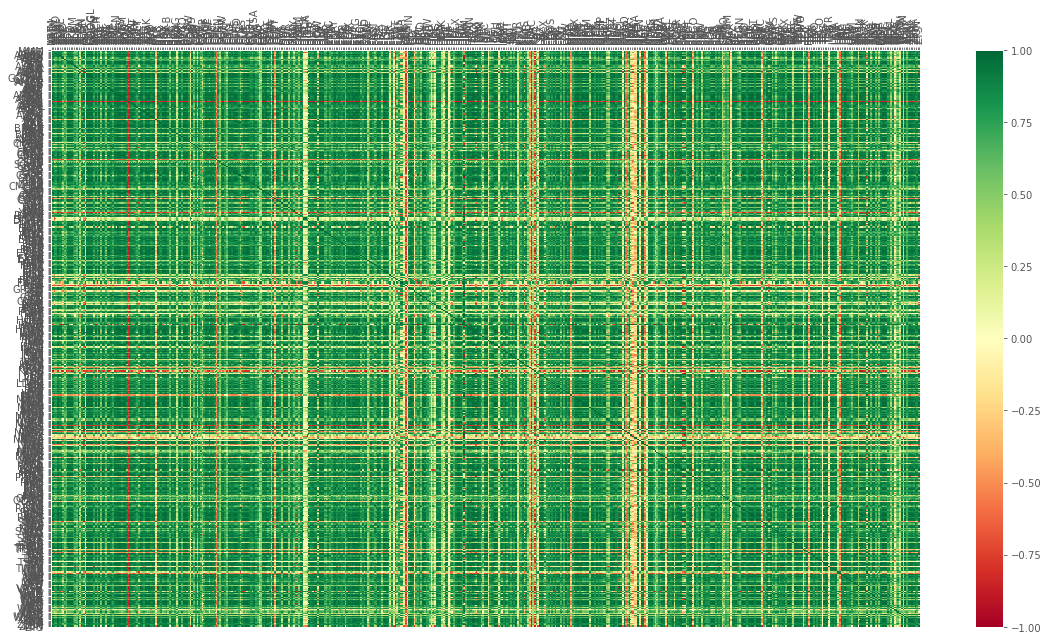

In [21]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1,1,1)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()


visualize_data()

### <a>9. Preprocessing data to prepare for Machine Learning with stock data</a>

- Features are the pricing changes that day for all companies
- Label will be whether or not we actually want to buy a specific company.

What we'll do for feature sets is take into account all company percent changes that day, and those will be our features. Our label will be whether or not Exxon (XOM) rose more than x% within the next x days, where we can pick whatever we want for x. To start, let's say a company is a buy if, within the next 7 days, its price goes up more than 2% and it is a sell if the price goes down more than 2% within those 7 days.

In [22]:
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)

    for i in range(1,hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]

    df.fillna(0, inplace=True)
    return tickers, df

### <a>10. Creating targets for machine learning labels</a>

You might want to have something that dictates buy, sell, or hold, or maybe just buy or sell. I am going to have us do the former. Basically, if the price rises more than 2% in the next 7 days, we're going to say that's a buy. If it drops more than 2% in the next 7 days, that's a sell. If it doesn't do either of those, then it's not moving enough, and we're going to just hold whatever our position is.

In [23]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)] ))
    
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:',Counter(str_vals))
    
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values

    return X,y,df

X,y,df = extract_featuresets('XOM')
# plt.plot(X)

Data spread: Counter({'0': 961, '1': 864, '-1': 785})


### <a>12. Machine learning</a>



In [25]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    clf = VotingClassifier([('lsvc', svm.LinearSVC(max_iter=2000)),
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier(n_estimators=100))])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:', confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:', Counter(predictions))
    print()
    print()
    return confidence


# examples of running:
do_ml('XOM')
# do_ml('AAPL')
# do_ml('ABT')

Data spread: Counter({'0': 961, '1': 864, '-1': 785})


C:\Users\lfu7\AppData\Local\Continuum\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy: 0.3782542113323124
predicted class counts: Counter({0: 332, -1: 172, 1: 149})




0.3782542113323124